In [1]:
import os
import dill as pickle

import numpy as np
import torch
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from policy import config
from policy.dataset.ms2dataset import get_MS_loaders
from policy.checkpoints import CheckpointIO

model_dir = "/home/mrl/Documents/Projects/tskill/out/PegInsertion/Plan/027"

cfg_path = os.path.join(model_dir, "config.yaml")
cfg = config.load_config(cfg_path, None)
method = cfg["method"]
if method == "plan":
        cfg["vae_cfg"] = config.load_config(os.path.join(cfg["model"]["vae_path"],"config.yaml"))

# index_path = os.path.join(model_dir, "data_info.pickle")
# with open(index_path, 'rb') as f:
#     data_info = pickle.load(f)

# Dataset
cfg["data"]["pad"] = False
cfg["data"]["augment"] = False
cfg["data"]["augmentation"]["seq_masking_rate"] = 0
cfg["data"]["augmentation"]["type_masking_rate"] = 0
cfg["data"]["augmentation"]["image_aug"] = 0
cfg["data"]["full_seq"] = False
cfg["model"]["autoregressive_decode"] = True

# Load only the full episode version of the dataset
# if "train_ep_indices" not in data_info.keys():
#     train_idx, val_idx = data_info["train_indices"], data_info["val_indices"]
# else:
#     train_idx, val_idx = data_info["train_ep_indices"], data_info["val_ep_indices"]
train_dataset, val_dataset = get_MS_loaders(cfg, return_datasets=True,
                                            save_override=True,
                                            fullseq_override=True)

Found existing data info file
Loading indices from file: out/PegInsertion/Plan/027/data_info.pickle
Overriding full seq config!
Loading action and state scaling from file
Adding batch dimension to returned data!


tensor([[[False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  T

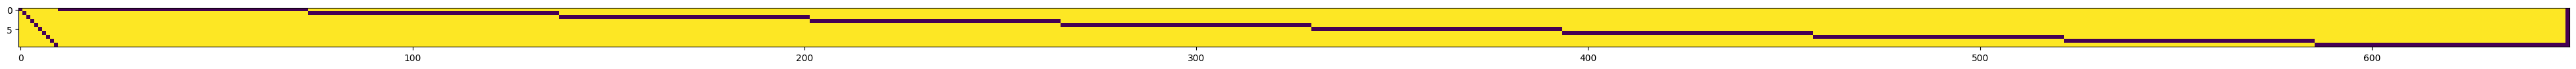

In [4]:
torch.set_printoptions(threshold=10000)
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
plt.close()
i = 1
data = train_dataset[i]
seq = data["actions"].shape[1]
# mask = data["dec_mask"]
# mask = data["mem_mask"]
mask = data["dec_mem_mask"]
print(mask)

fig = plt.figure(1, figsize=(50,50))
ax1 = fig.subplots(1,1)
# ax1.xaxis.set_major_locator(MultipleLocator(10))
# ax1.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_major_locator(MultipleLocator(10))
# ax1.yaxis.set_minor_locator(MultipleLocator(1))

ax1.imshow(mask.squeeze(0).to(torch.int))

# path = "/home/mrl/Documents/Projects/tskill/ERROR_DATA.pickle"
# with open(path, "rb") as f:
#     data = pickle.load(f)

# Images
# print(data["rgb"].shape)
# n = data["rgb"].shape[0]
# n_cams = data["rgb"].shape[1]
# for im in range(50):
#     fig = plt.figure(im)
#     axes = fig.subplots(1,n_cams)
#     for c in range(n_cams):
#         axes[c].imshow(data["rgb"][im,c,...].permute(1,2,0))
    # ax3.imshow(data["enc_mask"].to(torch.int))
    # ax4.imshow(data["dec_mask"].to(torch.int))

# Masks
# bs = data["actions"].shape[0]
# enc_mask = data["enc_mask"][0,...]
# for b in range(bs):
#     fig = plt.figure(b, figsize=(20,10))
#     ax1, ax2, ax3= fig.subplots(1,3)
#     seq_pad_mask = data["seq_pad_mask"][b,...]
#     seq_pad_mask = seq_pad_mask.unsqueeze(0).repeat(4*seq_pad_mask.shape[0], 4)
#     print(torch.logical_not((seq_pad_mask[0,...] | data["enc_mask"][b,0,...])).to(torch.int).sum())
#     ax1.imshow(data["enc_mask"][b,...].to(torch.int))
#     ax2.imshow(seq_pad_mask.to(torch.int))
#     ax3.imshow((data["enc_mask"][b,...] | seq_pad_mask).to(torch.int))

# data["enc_mask"][3,...] = torch.zeros_like(data["enc_mask"][3,...])


In [3]:
# Model
model = config.get_model(cfg, device="cpu")
checkpoint_io = CheckpointIO(model_dir, model=model)
load_dict = checkpoint_io.load("model_best.pt")
model.train()
out = model(data)

/home/mrl/anaconda3/envs/tskill/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/home/mrl/anaconda3/envs/tskill/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mrl/anaconda3/envs/tskill/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_We

freezing state encoder network!
/home/mrl/Documents/Projects/tskill/out/PegInsertion/VAE/059/model_best.pt
=> Loading checkpoint from local file...
load state dict: <All keys matched successfully>
Freezing state encoder network!
/home/mrl/Documents/Projects/tskill/out/PegInsertion/Plan/027/model_best.pt
=> Loading checkpoint from local file...
load state dict: <All keys matched successfully>


KeyError: 'rgb'